# Modelo de Regresión Lineal para predecir el precio del aguacate

La **Regresión Lineal** busca modelar la relación lineal entre las variables predictoras (`X`) y la variable objetivo (`y = AveragePrice`).  

En este notebook se realizarán los siguientes pasos:

1. Cargar el dataset limpio y estandarizado.
2. Separar la variable objetivo (`AveragePrice`) de las variables predictoras.
3. Dividir los datos en conjuntos de entrenamiento y prueba.
4. Entrenar un modelo de Regresión Lineal.
5. Evaluar el desempeño del modelo usando MAE, RMSE y R².
6. Exportar los coeficientes del modelo para analizar la importancia de las variables.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import numpy as np
import os

# ------------------------------------------------------------
# 1️⃣ Cargar dataset único
# ------------------------------------------------------------
file_path = "avocado_final_clean.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo: {file_path}")

df = pd.read_csv(file_path)
print(f"✅ Archivo cargado correctamente: {df.shape[0]} filas, {df.shape[1]} columnas")

# ------------------------------------------------------------
# 2️⃣ Dividir en entrenamiento y prueba
# ------------------------------------------------------------
# Usa 80% entrenamiento y 20% prueba (ajustable)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"📊 División completada -> Entrenamiento: {train_df.shape}, Prueba: {test_df.shape}")

# ------------------------------------------------------------
# 3️⃣ Seleccionar variables relevantes
# ------------------------------------------------------------
# Eliminamos variables redundantes o directamente relacionadas con la variable objetivo
cols_to_drop = [
    "AveragePrice", "4046", "4225", "4770",
    "Total Bags", "Small Bags", "Large Bags", "year_date"
]

# Identificar columnas de región (ya sin eliminar ninguna)
region_cols = [c for c in df.columns if c.startswith("region_")]

# Variables finales seleccionadas
selected_features = [
    "Total Volume", "XLarge Bags", "year", "month", "type_organic"
] + region_cols

# Filtramos solo las columnas que realmente existen
selected_features = [c for c in selected_features if c in df.columns]
print(f"✅ Variables seleccionadas para el modelo: {len(selected_features)} columnas")

# ------------------------------------------------------------
# 4️⃣ Separar variable objetivo y predictoras
# ------------------------------------------------------------
X_train = train_df[selected_features]
y_train = train_df["AveragePrice"]

X_test = test_df[selected_features]
y_test = test_df["AveragePrice"]

# ------------------------------------------------------------
# 5️⃣ Entrenar modelo de Regresión Lineal
# ------------------------------------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Modelo de Regresión Lineal entrenado correctamente.")

# ------------------------------------------------------------
# 6️⃣ Realizar predicciones y evaluar desempeño
# ------------------------------------------------------------
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📈 Resultados del modelo de Regresión Lineal:")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")

# ------------------------------------------------------------
# 7️⃣ Importancia de las variables (coeficientes)
# ------------------------------------------------------------
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": lr_model.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("\n🔍 Coeficientes más influyentes:")
print(coef_df.head(10))

# ------------------------------------------------------------
# 8️⃣ Exportar resultados
# ------------------------------------------------------------
coef_df.to_csv("linear_regression_coefficients.csv", index=False)
print("\n💾 Archivo exportado: linear_regression_coefficients.csv")


✅ Archivo cargado correctamente: 18249 filas, 68 columnas
📊 División completada -> Entrenamiento: (14599, 68), Prueba: (3650, 68)
✅ Variables seleccionadas para el modelo: 58 columnas
✅ Modelo de Regresión Lineal entrenado correctamente.

📈 Resultados del modelo de Regresión Lineal:
MAE  (Error Absoluto Medio): 0.1903
RMSE (Raíz del Error Cuadrático Medio): 0.2490
R²   (Coeficiente de Determinación): 0.6029

🔍 Coeficientes más influyentes:
                   Variable  Coeficiente
22           region_Houston    -0.370702
15     region_DallasFtWorth    -0.348476
13  region_CincinnatiDayton    -0.346872
30         region_Nashville    -0.339339
49      region_SouthCentral    -0.329930
43           region_Roanoke    -0.312975
14          region_Columbus    -0.307491
32           region_NewYork     0.299550
27        region_Louisville    -0.295410
46      region_SanFrancisco     0.283554

💾 Archivo exportado: linear_regression_coefficients.csv


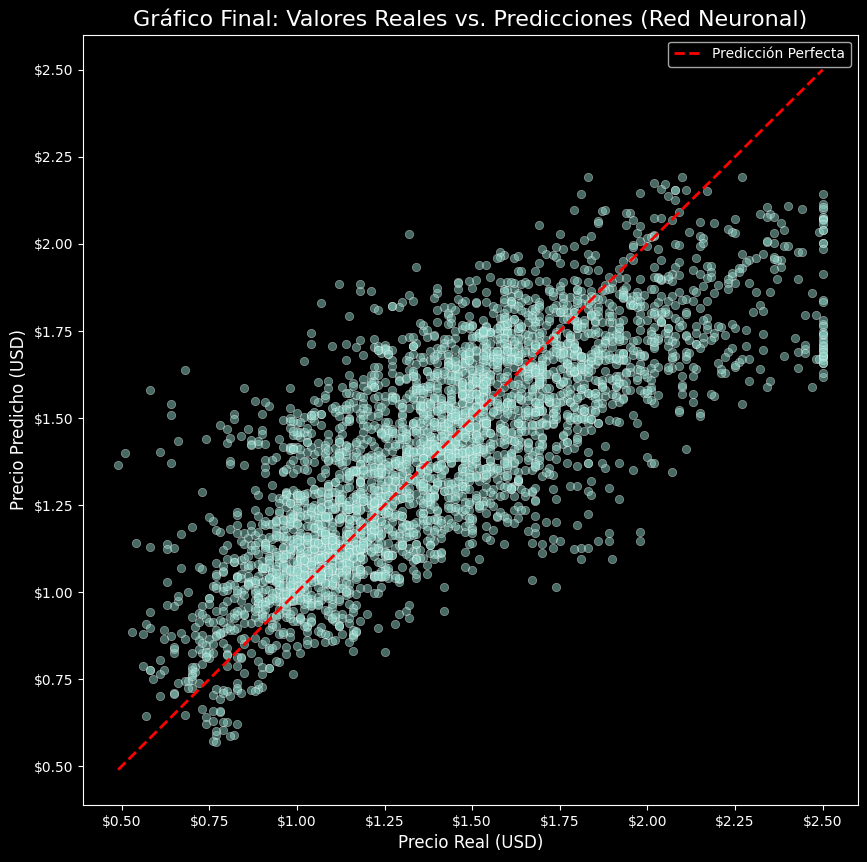

In [8]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Dibujamos la línea de predicción perfecta (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.title('Gráfico Final: Valores Reales vs. Predicciones (Red Neuronal)', fontsize=16)
plt.xlabel('Precio Real (USD)', fontsize=12)
plt.ylabel('Precio Predicho (USD)', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.legend()
plt.show()